<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Model_training_prototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load Dependencies**

In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 49kB/s 
     |████████████████████████████████| 3.0MB 42.3MB/s 
     |████████████████████████████████| 419kB 49.0MB/s 


In [0]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

%matplotlib inline

## **Building & Deploying an Apparel Classifier**

### **Load Dataset**

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\nTrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))

4423680/4422102 [==============================] - 0s 0us/step

Train_images.shape: (60000, 28, 28), of uint8
Test_images.shape: (10000, 28, 28), of uint8


## **Training a simple CNN model from Scratch**

### **Reshaping Image Data for Modeling**

In [5]:
#reshape for feeding into the model
train_images_gr = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 28, 28, 1)

print('\nTrain_images.shape: {}, of {}'.format(train_images_gr.shape, train_images_gr.dtype))
print('\nTest_images.shape: {}, of {}'.format(test_images_gr.shape, test_images_gr.dtype))


Train_images.shape: (60000, 28, 28, 1), of uint8

Test_images.shape: (10000, 28, 28, 1), of uint8


### **Visualize sample images**

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


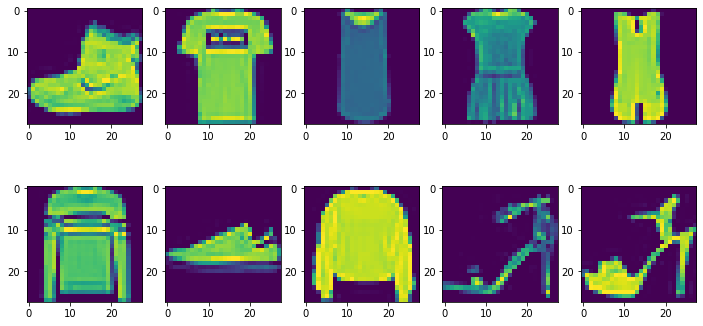

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
ax[0, 0].imshow(train_images_gr[0].reshape(28, 28))
ax[0, 1].imshow(train_images_gr[1].reshape(28, 28))
ax[0, 2].imshow(train_images_gr[2].reshape(28, 28))
ax[0, 3].imshow(train_images_gr[3].reshape(28, 28))
ax[0, 4].imshow(train_images_gr[4].reshape(28, 28))
ax[1, 0].imshow(train_images_gr[5].reshape(28, 28))
ax[1, 1].imshow(train_images_gr[6].reshape(28, 28))
ax[1, 2].imshow(train_images_gr[7].reshape(28, 28))
ax[1, 3].imshow(train_images_gr[8].reshape(28, 28))
ax[1, 4].imshow(train_images_gr[9].reshape(28, 28))

print([class_names[i] for i in train_labels[:10]])

### **Build CNN Model Architecture**

In [0]:
INPUT_SHAPE = (28, 28, 1)

def create_cnn_architecture_model1(input_shape):
  inp = keras.layers.Input(shape = input_shape)

  conv1 = keras.layers.Conv2D(filters=16, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding='same')(inp)
  pool1 = keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
  conv2 = keras.layers.Conv2D(filters=32, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding='same')(pool1)
  pool2 = keras.layers.MaxPooling2D(pool_size =(2, 2))(conv2)

  flat = keras.layers.Flatten()(pool2)

  hidden1 = keras.layers.Dense(256, activation='relu')(flat)
  drop1 = keras.layers.Dropout(rate=0.3)(hidden1)

  out = keras.layers.Dense(10, activation = 'softmax')(drop1)

  model = keras.Model(inputs=inp, outputs=out)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [8]:
model = create_cnn_architecture_model1(input_shape=INPUT_SHAPE)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               401664

### **Model Training**

In [9]:
EPOCHS = 10
train_images_scaled = train_images_gr / 255.
model.fit(train_images_scaled, train_labels, validation_split=0.1, epochs=EPOCHS)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 15s 273us/sample - loss: 0.4545 - accuracy: 0.8357 - val_loss: 0.3120 - val_accuracy: 0.8862
Epoch 2/10
54000/54000 [==============================] - 8s 146us/sample - loss: 0.3056 - accuracy: 0.8891 - val_loss: 0.2848 - val_accuracy: 0.8903
Epoch 3/10
54000/54000 [==============================] - 8s 144us/sample - loss: 0.2612 - accuracy: 0.9046 - val_loss: 0.2561 - val_accuracy: 0.9020
Epoch 4/10
54000/54000 [==============================] - 8s 148us/sample - loss: 0.2325 - accuracy: 0.9147 - val_loss: 0.2401 - val_accuracy: 0.9115
Epoch 5/10
54000/54000 [==============================] - 8s 151us/sample - loss: 0.2098 - accuracy: 0.9226 - val_loss: 0.2339 - val_accuracy: 0.9157
Epoch 6/10
54000/54000 [==============================] - 8s 143us/sample - loss: 0.1891 - accuracy: 0.9286 - val_loss: 0.2441 - val_accuracy: 0.9117
Epoch 7/10
54000/54000 [==========================

### **Save Model Weights**

In [0]:
import os

if not os.path.isdir('model_weights/'):
  os.mkdir('model_weights/')

model.save_weights(filepath= 'model_weights/cnn_model1_wt.h5', overwrite=True)

### **Build Model Architecture and Load Model Weights**

In [0]:
model = create_cnn_architecture_model1(input_shape=INPUT_SHAPE)
model.load_weights('model_weights/cnn_model1_wt.h5')

### **Evaluate Model Performance on Test Data**

In [12]:
test_images_scaled = test_images_gr / 255.
predictions = model.predict(test_images_scaled)
predictions[:5]

array([[3.2201641e-10, 9.9601265e-11, 1.7097684e-11, 2.6733574e-12,
        3.8706949e-14, 4.6951385e-08, 2.1165492e-10, 3.7328386e-06,
        5.5910454e-12, 9.9999619e-01],
       [2.3883952e-06, 4.5564983e-16, 9.9999535e-01, 2.4299649e-09,
        5.2777136e-08, 2.2843714e-15, 2.1662629e-06, 1.7365359e-19,
        1.1381398e-12, 4.5614855e-14],
       [1.7035331e-13, 1.0000000e+00, 1.3777361e-16, 5.0966674e-13,
        4.7717084e-18, 2.1355547e-18, 1.4347315e-14, 1.4429070e-25,
        2.8800603e-16, 5.1436655e-26],
       [2.5959234e-13, 1.0000000e+00, 2.3996795e-16, 2.0491137e-11,
        6.0351870e-16, 1.9818513e-17, 1.3883076e-14, 1.5566638e-26,
        1.8113081e-19, 5.3787716e-24],
       [4.4905405e-02, 1.5136965e-10, 5.4451352e-04, 2.5514382e-06,
        1.4470932e-04, 3.8549269e-10, 9.5440280e-01, 5.3083757e-12,
        2.1257422e-08, 2.7874472e-09]], dtype=float32)

In [13]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([9, 2, 1, 1, 6])

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(test_labels, prediction_labels, target_names = class_names))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns = class_names)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.80      0.93      0.86      1000
       Dress       0.89      0.95      0.92      1000
        Coat       0.90      0.81      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.83      0.70      0.76      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,874,0,21,30,2,2,64,0,7,0
Trouser,0,985,0,10,1,0,3,0,1,0
Pullover,16,1,929,5,25,0,24,0,0,0
Dress,10,1,12,950,12,0,13,0,2,0
Coat,0,0,111,36,812,0,39,0,2,0
Sandal,0,0,0,0,0,987,0,11,0,2
Shirt,108,2,90,34,52,2,705,0,7,0
Sneaker,0,0,0,0,0,6,0,981,0,13
Bag,6,0,0,4,1,3,3,3,980,0
Ankle boot,0,0,0,0,0,5,2,43,0,950


## **Fine-tuning a pre-trained ResNet-50 CNN Model***

### **Build CNN Model Architecture**